<a href="https://colab.research.google.com/github/Kgs-Mathaba/Apple_Stock_Price_Prediction_And_Forecasting_Using_LSTM_Neural_Network/blob/main/Apple_Stock_Price_Prediction_And_Forecasting_Using_LSTM_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
key = '################################'

In [ ]:
# Data Collection
import pandas_datareader as pdr

df = pdr.get_data_tiingo('AAPL', api_key = key)
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-27 00:00:00+00:00,117.26,117.8000,116.49,116.52,18296855,27.590363,27.717421,27.409188,27.416247,73187420,0.0,1.0
1,AAPL,2016-12-28 00:00:00+00:00,116.76,118.0166,116.20,117.52,20905892,27.472717,27.768385,27.340953,27.651539,83623568,0.0,1.0
2,AAPL,2016-12-29 00:00:00+00:00,116.73,117.1095,116.40,116.45,15039519,27.465658,27.554951,27.388012,27.399776,60158076,0.0,1.0
3,AAPL,2016-12-30 00:00:00+00:00,115.82,117.2000,115.43,116.65,30586265,27.251542,27.576245,27.159778,27.446835,122345060,0.0,1.0
4,AAPL,2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865,27.329189,27.371541,27.002132,27.246836,115127460,0.0,1.0
5,AAPL,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.298601,27.413894,27.235072,27.258601,84472464,0.0,1.0
6,AAPL,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.437423,27.497234,27.249189,27.275071,88774348,0.0,1.0
7,AAPL,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.743303,27.802126,27.404482,27.477423,127007600,0.0,1.0
8,AAPL,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,27.997418,28.100947,27.750362,27.752715,134247792,0.0,1.0
9,AAPL,2017-01-10 00:00:00+00:00,119.11,119.3800,118.30,118.77,24462051,28.025654,28.089182,27.835067,27.945654,97848204,0.0,1.0


In [ ]:
df.tail(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1247,AAPL,2021-12-09 00:00:00+00:00,174.56,176.75,173.9200,174.910,108923739,174.56,176.75,173.9200,174.910,108923739,0.0,1.0
1248,AAPL,2021-12-10 00:00:00+00:00,179.45,179.63,174.6900,175.205,115402731,179.45,179.63,174.6900,175.205,115402731,0.0,1.0
1249,AAPL,2021-12-13 00:00:00+00:00,175.74,182.13,175.5300,181.115,153237019,175.74,182.13,175.5300,181.115,153237019,0.0,1.0
1250,AAPL,2021-12-14 00:00:00+00:00,174.33,177.74,172.2100,175.250,139380382,174.33,177.74,172.2100,175.250,139380382,0.0,1.0
1251,AAPL,2021-12-15 00:00:00+00:00,179.30,179.50,172.3108,175.110,131063257,179.30,179.50,172.3108,175.110,131063257,0.0,1.0
1252,AAPL,2021-12-16 00:00:00+00:00,172.26,181.14,170.7500,179.280,150185843,172.26,181.14,170.7500,179.280,150185843,0.0,1.0
1253,AAPL,2021-12-17 00:00:00+00:00,171.14,173.47,169.6900,169.930,195923441,171.14,173.47,169.6900,169.930,195923441,0.0,1.0
1254,AAPL,2021-12-20 00:00:00+00:00,169.75,170.58,167.4600,168.280,107499114,169.75,170.58,167.4600,168.280,107499114,0.0,1.0
1255,AAPL,2021-12-21 00:00:00+00:00,172.99,173.20,169.1200,171.555,91185905,172.99,173.20,169.1200,171.555,91185905,0.0,1.0
1256,AAPL,2021-12-22 00:00:00+00:00,175.64,175.86,172.1500,173.040,92135303,175.64,175.86,172.1500,173.040,92135303,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1[1228:]

1228    147.87
1229    149.99
1230    150.00
1231    151.00
1232    153.49
1233    157.87
1234    160.55
1235    161.02
1236    161.41
1237    161.94
1238    156.81
1239    160.24
1240    165.30
1241    164.77
1242    163.76
1243    161.84
1244    165.32
1245    171.18
1246    175.08
1247    174.56
1248    179.45
1249    175.74
1250    174.33
1251    179.30
1252    172.26
1253    171.14
1254    169.75
1255    172.99
1256    175.64
Name: close, dtype: float64

In [ ]:
df1.shape

(1257,)

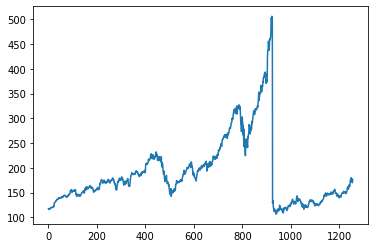

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1);

In [ ]:
# LSTM sensetive to scale of data, so scale data using MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) #reshape with (-1, 1) provides column as 1 but rows as unknown 

In [ ]:
df1[:10]

array([[0.02609894],
       [0.02484659],
       [0.02477145],
       [0.02249217],
       [0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262]])

In [ ]:
# Splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [ ]:
# Creating lag features
import numpy as np
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    x = dataset[i:(i+time_step), 0]
    y = dataset[i + time_step, 0]
    dataX.append(x)
    dataY.append(y)
  return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t, t+1, t+2, t+3 amd Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train[:5])

[[0.02609894 0.02484659 0.02477145 0.02249217 0.02331872 0.02299311
  0.02447088 0.02772699 0.03043206 0.03073262 0.03233563 0.03108328
  0.03055729 0.0329618  0.03293676 0.03241077 0.0329618  0.03316218
  0.03288666 0.03767063 0.03782091 0.03784596 0.03704446 0.03634314
  0.0548779  0.05432686 0.05570445 0.05873513 0.06184095 0.06311835
  0.06407013 0.06331872 0.06624922 0.07058234 0.07180964 0.07139637
  0.07233563 0.07479023 0.07581716 0.07436443 0.07469004 0.07536631
  0.07551659 0.08252974 0.08045085 0.0825047  0.08140263 0.08185348
  0.08055103 0.07974953 0.08090169 0.08105197 0.08052599 0.08420789
  0.08478397 0.08303068 0.08671259 0.08265498 0.0866124  0.08536005
  0.08465874 0.08525986 0.09257358 0.09337508 0.09289919 0.09222292
  0.09232311 0.09500313 0.09312461 0.09222292 0.09142142 0.09099562
  0.08713838 0.08756418 0.08568566 0.08763932 0.08606137 0.08475892
  0.08916719 0.08874139 0.09217282 0.094402   0.09227301 0.09254853
  0.09219787 0.09953663 0.101866   0.10073889 0.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [ ]:
# reshape input to be [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1))) # input shape=(time_step, features)
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 497ms/step - loss: 0.0168 - val_loss: 0.0151
Epoch 2/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0042 - val_loss: 0.0241
Epoch 3/100
12/12 [==============================] - 4s 307ms/step - loss: 0.0021 - val_loss: 0.0178
Epoch 4/100
12/12 [==============================] - 4s 294ms/step - loss: 8.9935e-04 - val_loss: 0.0205
Epoch 5/100
12/12 [==============================] - 4s 305ms/step - loss: 8.7516e-04 - val_loss: 0.0216
Epoch 6/100
12/12 [==============================] - 4s 359ms/step - loss: 8.9128e-04 - val_loss: 0.0192
Epoch 7/100
12/12 [==============================] - 4s 303ms/step - loss: 8.4615e-04 - val_loss: 0.0180
Epoch 8/100
12/12 [==============================] - 4s 302ms/step - loss: 7.6036e-04 - val_loss: 0.0171
Epoch 9/100
12/12 [==============================] - 4s 307ms/step - loss: 6.9873e-04 - val_loss: 0.0163
Epoch 10/100
12/12 [==============================] - 4s 304ms/ste

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
# Prediction and perfomance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
# Transform into roginal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE perfomance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

205.05681154079605

In [ ]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

159.62361782051352

No handles with labels found to put in legend.


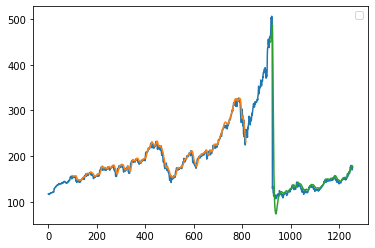

In [ ]:
# Plotting
# Shift train predictions for plotting
look_back = 100
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict
# Shift test predictions for plotting
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.legend()
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1, -1) #previous 100 days
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for the next 10 days

lst_output=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:]) #shit one position to t+1
    print('{} day input {}'.format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day input {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1)) # reshape for LSTM
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[0.1747321]
101
1 day input [0.10046337 0.10073889 0.09843456 0.09830933 0.09708203 0.09773325
 0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0

In [ ]:
day_new=np.arange(1, 101)
day_pred=np.arange(101, 131)

In [ ]:
len(df1)

1257

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

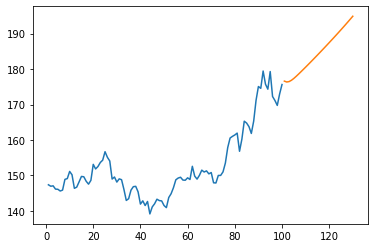

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

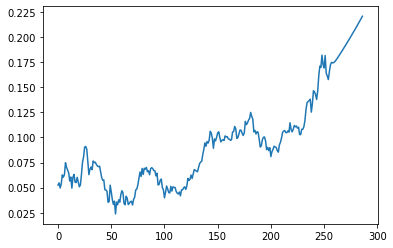

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])